## Preprocesamiento de Datos

In [ ]:
#Importación de las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import xgboost as XGBClassifier
import seaborn as sns

In [9]:
df = pd.read_csv("panic_disorder_dataset_training.csv")

In [10]:
df_noid = df.drop(["Participant ID"], axis=1)

In [ ]:
#Creación de la función para llenar valores nulos
def fill_missing_with_random_sample(column):
    non_null_values = column.dropna()  
    if not non_null_values.empty:
        return column.apply(lambda x: np.random.choice(non_null_values) if pd.isna(x) else x)
    return column

In [ ]:
#Llenado de valores nulos
columns_to_fill = ["Medical History", "Psychiatric History", "Substance Use"]  # Specify relevant columns
df_noid[columns_to_fill] = df_noid[columns_to_fill].apply(fill_missing_with_random_sample)

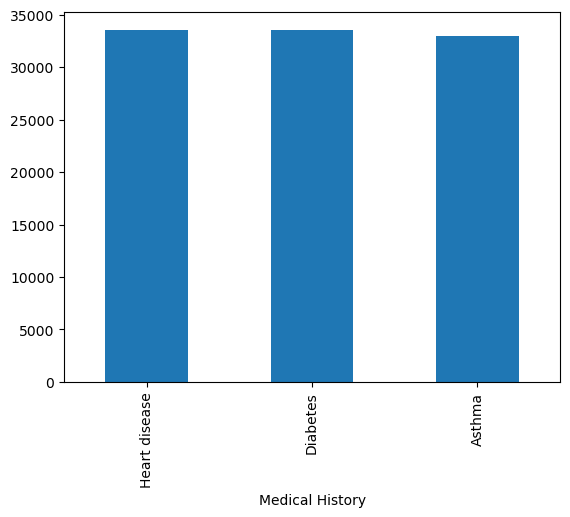

In [ ]:
#Visualización de que los datos nulos estén llenados correctamente
df_noid["Medical History"].value_counts().plot(kind = "bar")
plt.show()

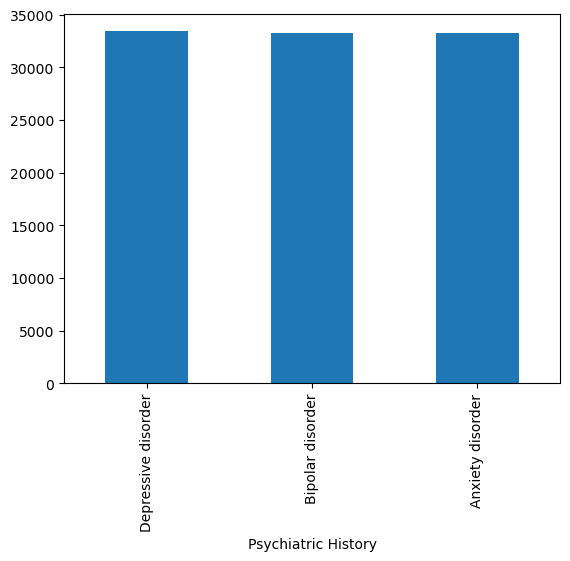

In [ ]:
#Visualización de que los datos nulos estén llenados correctamente
df_noid["Psychiatric History"].value_counts().plot(kind = "bar")
plt.show()

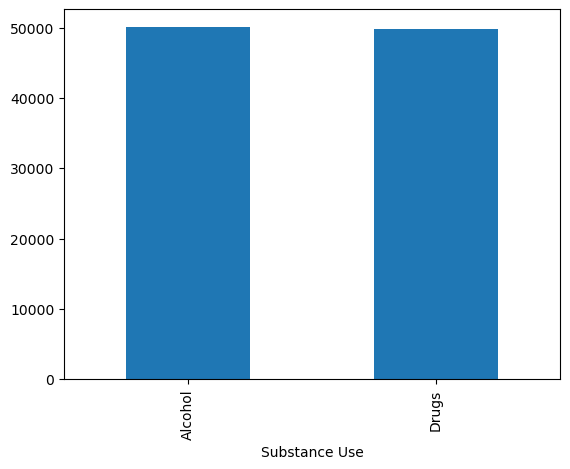

In [ ]:
#Visualización de que los datos nulos estén llenados correctamente
df_noid["Substance Use"].value_counts().plot(kind = "bar")
plt.show()

In [ ]:
#Visualización del Dataset
df_noid

,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Panic Disorder Diagnosis
0,38,Male,No,Yes,Moderate,Shortness of breath,Mild,Mild,Rural,Diabetes,Bipolar disorder,Alcohol,Socializing,High,Sleep quality,0
1,51,Male,No,No,High,Panic attacks,Mild,Mild,Urban,Asthma,Anxiety disorder,Drugs,Exercise,High,Sleep quality,0
2,32,Female,Yes,No,High,Panic attacks,Mild,Significant,Urban,Diabetes,Depressive disorder,Alcohol,Seeking therapy,Moderate,Exercise,0
3,64,Female,No,No,Moderate,Chest pain,Moderate,Moderate,Rural,Diabetes,Anxiety disorder,Alcohol,Meditation,High,Exercise,0
4,31,Male,Yes,No,Moderate,Panic attacks,Mild,Moderate,Rural,Asthma,Anxiety disorder,Drugs,Seeking therapy,Low,Sleep quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,22,Male,Yes,No,High,Chest pain,Mild,Mild,Rural,Heart disease,Depressive disorder,Drugs,Socializing,Low,Diet,0
99996,57,Female,No,Yes,Low,Panic attacks,Severe,Mild,Rural,Heart disease,Depressive disorder,Alcohol,Meditation,High,Diet,0
99997,20,Male,Yes,No,Moderate,Panic attacks,Severe,Moderate,Rural,Heart disease,Bipolar disorder,Alcohol,Seeking therapy,Low,Exercise,0
99998,56,Female,Yes,Yes,High,Chest pain,Severe,Mild,Rural,Diabetes,Anxiety disorder,Drugs,Socializing,High,Sleep quality,1


In [ ]:
#Imprimimmos las columnas que hay, para extraer a las que les aplicaremos dummies más fácil
df_noid.columns

Index(['Age', 'Gender', 'Family History', 'Personal History',
       'Current Stressors', 'Symptoms', 'Severity', 'Impact on Life',
       'Demographics', 'Medical History', 'Psychiatric History',
       'Substance Use', 'Coping Mechanisms', 'Social Support',
       'Lifestyle Factors', 'Panic Disorder Diagnosis'],
      dtype='object')

In [ ]:
#Se crea una lista de las columnas que se les aplicará dummies
dummies = ['Gender', 'Family History', 'Personal History',
       'Current Stressors', 'Symptoms', 'Severity', 'Impact on Life',
       'Demographics', 'Medical History', 'Psychiatric History',
       'Substance Use', 'Coping Mechanisms', 'Social Support',
       'Lifestyle Factors']

In [ ]:
#Aplicamos las dummies en una copia del dataset original por si luego necesitamos los valores sin dummies
df_f = df_noid.copy()
df_f = pd.get_dummies(df_f,dummies).astype(int)

In [ ]:
#Imprimimos el dataset dummiesado
df_f

,Age,Panic Disorder Diagnosis,Gender_Female,Gender_Male,Family History_No,Family History_Yes,Personal History_No,Personal History_Yes,Current Stressors_High,Current Stressors_Low,...,Coping Mechanisms_Exercise,Coping Mechanisms_Meditation,Coping Mechanisms_Seeking therapy,Coping Mechanisms_Socializing,Social Support_High,Social Support_Low,Social Support_Moderate,Lifestyle Factors_Diet,Lifestyle Factors_Exercise,Lifestyle Factors_Sleep quality
0,38,0,0,1,1,0,0,1,0,0,...,0,0,0,1,1,0,0,0,0,1
1,51,0,0,1,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,32,0,1,0,0,1,1,0,1,0,...,0,0,1,0,0,0,1,0,1,0
3,64,0,1,0,1,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,31,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,22,0,0,1,0,1,1,0,1,0,...,0,0,0,1,0,1,0,1,0,0
99996,57,0,1,0,1,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,0
99997,20,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
99998,56,1,1,0,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,1


In [ ]:
#Creamos las variables X y Y
X = df_f.drop(["Panic Disorder Diagnosis"], axis = 1)
Y = df_f["Panic Disorder Diagnosis"]

In [ ]:
#Imprimimos X para ver que sean las variables correctas
X

,Age,Gender_Female,Gender_Male,Family History_No,Family History_Yes,Personal History_No,Personal History_Yes,Current Stressors_High,Current Stressors_Low,Current Stressors_Moderate,...,Coping Mechanisms_Exercise,Coping Mechanisms_Meditation,Coping Mechanisms_Seeking therapy,Coping Mechanisms_Socializing,Social Support_High,Social Support_Low,Social Support_Moderate,Lifestyle Factors_Diet,Lifestyle Factors_Exercise,Lifestyle Factors_Sleep quality
0,38,0,1,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,1
1,51,0,1,1,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2,32,1,0,0,1,1,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
3,64,1,0,1,0,1,0,0,0,1,...,0,1,0,0,1,0,0,0,1,0
4,31,0,1,0,1,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,22,0,1,0,1,1,0,1,0,0,...,0,0,0,1,0,1,0,1,0,0
99996,57,1,0,1,0,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
99997,20,0,1,0,1,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
99998,56,1,0,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,1


In [ ]:
#Imprimmos Y para ver que igual este correcto
Y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    1
99999    0
Name: Panic Disorder Diagnosis, Length: 100000, dtype: int32

In [ ]:
#Vemos la distribución de las clases 
print(sum(Y)/len(Y))

0.04285


## Entrenamiento del Modelo

In [ ]:
#Partición de los datos
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state = 42, stratify=Y, test_size  = 0.2)

In [26]:
x_train.shape

(80000, 41)

In [27]:
sum(y_train)/len(y_train)

0.04285

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(
    objective="binary:logistic",#Indicamos el problema a resolver con el modelo , que en este caso sería clasificación con una función logística
    eval_metric="auc",#Utiliza el área bajo la curva como criterio de evaluación
    scale_pos_weight=19,#Ajusta el peso de las clases, el 19 sale de dividir los 95000 datos de entrenamiento con los 5000 de testeo
    learning_rate=0.1,#Es el valor de la taza de aprendizaje
    max_depth=6,#Máximo de profundidad de los árboles generados dentro del modelo
    min_child_weight=1,#Minimo de hijos
    gamma=0.2,#Con gamma redusimos el riesgo del sobreajuste
    subsample=0.8,#Utiliza el 80% de los datos para entrenar cada árbol, lo que ayuda a prevenir el sobreajuste.
    colsample_bytree=0.8,#Utiliza el 80% de las características para entrenar cada árbol, lo que también ayuda a prevenir el sobreajuste.
    n_estimators=200,#Define el número de árboles del modelo
    random_state=42,#Establece la generación de la semilla aleatoria
    use_label_encoder=False  # Desactiva el uso del codificador de etiquetas para evitar advertencias en versiones más recientes de XGBoost.
)

model.fit(x_train, y_train)

c:\Users\mokon\Documents\Anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:31:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

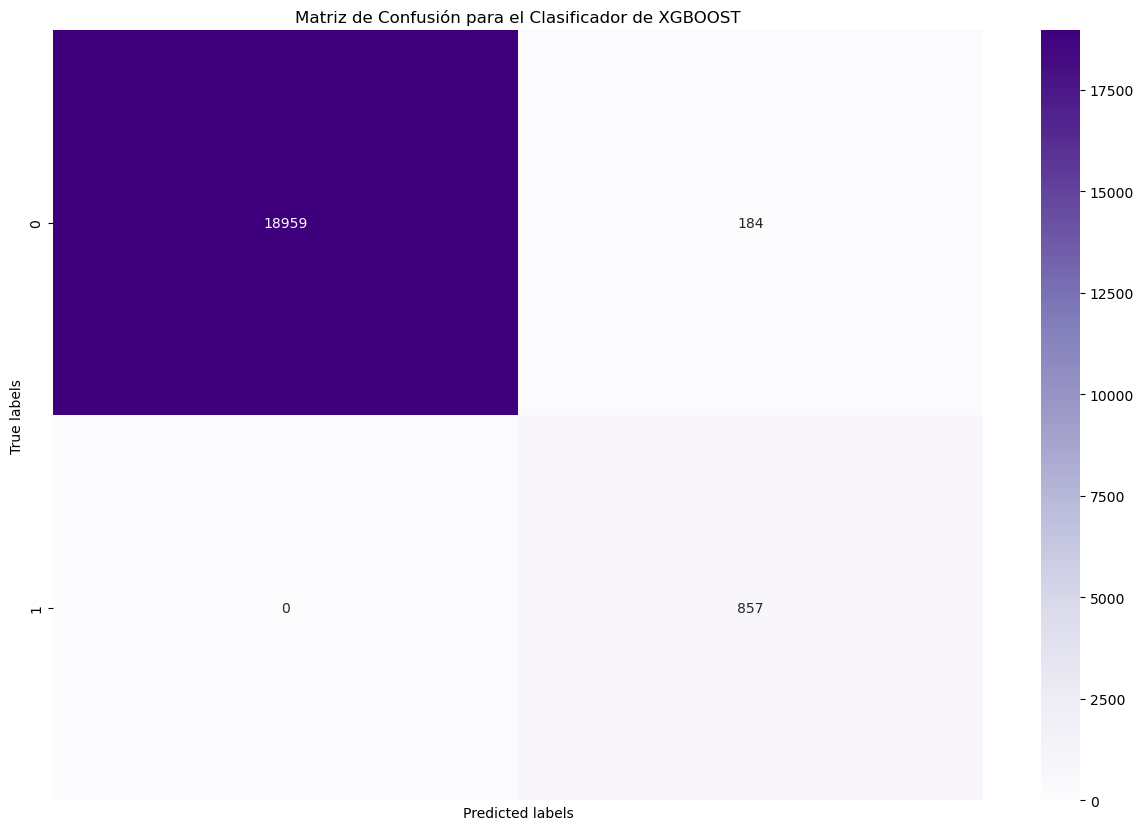

Precisión: (11644    0
3690     0
6230     0
73070    0
73021    0
        ..
60654    0
62556    0
13783    0
17702    0
52600    0
Name: Panic Disorder Diagnosis, Length: 20000, dtype: int32, array([0, 0, 0, ..., 0, 1, 0]))
Informe de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     19143
           1       0.82      1.00      0.90       857

    accuracy                           0.99     20000
   macro avg       0.91      1.00      0.95     20000
weighted avg       0.99      0.99      0.99     20000



In [ ]:
#Matriz de confusión
y_pred =model.predict(x_test)
cm_1 = confusion_matrix(y_test, y_pred)
# Creamos un mapa de calor para poder apreciar los resultados de manera visual
plt.figure(figsize=(15, 10))
sns.heatmap(cm_1, annot=True, fmt="d", cmap="Purples", xticklabels=0, yticklabels=1)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Matriz de Confusión para el Clasificador de XGBOOST')
plt.show()
accuracy = (y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Precisión: {accuracy}")
print("Informe de clasificación:")
print(report)

Con este modelo no solo se cumple con el apartado del proyecto de aplicar un modelo de clasificación, sino que también es el mejor resultado obtenido contro los modelos de RandomForest y RegresiónLogística, presentando un acurracy del 99% global, arrojando solo 184 falsos positivos y 0 falsos negativos, esto debido a que XGBOOST es un modelo hecho para datos complejos como lo son los categoricos y el gran volumen de datos.

## Testeo con 20000 datos de Testeo

El dataset incluía otro de 20000 datos que eran especificamente para testeo

In [30]:
test = pd.read_csv("Panic_disorder_dataset_testing.csv")

In [31]:
test = test.drop(["Participant ID"], axis=1)

In [32]:
test = pd.get_dummies(test,dummies).astype(int)

In [33]:
test

,Age,Panic Disorder Diagnosis,Gender_Female,Gender_Male,Family History_No,Family History_Yes,Personal History_No,Personal History_Yes,Current Stressors_High,Current Stressors_Low,...,Coping Mechanisms_Exercise,Coping Mechanisms_Meditation,Coping Mechanisms_Seeking therapy,Coping Mechanisms_Socializing,Social Support_High,Social Support_Low,Social Support_Moderate,Lifestyle Factors_Diet,Lifestyle Factors_Exercise,Lifestyle Factors_Sleep quality
0,41,0,0,1,0,1,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
1,20,0,1,0,0,1,1,0,0,1,...,1,0,0,0,1,0,0,1,0,0
2,32,0,0,1,0,1,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
3,41,0,1,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
4,36,0,1,0,0,1,1,0,1,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,31,0,1,0,0,1,0,1,1,0,...,1,0,0,0,0,0,1,0,0,1
19996,27,0,0,1,1,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0
19997,21,0,1,0,1,0,1,0,0,1,...,0,0,0,1,0,0,1,1,0,0
19998,28,0,0,1,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1


In [34]:
X_t = test.drop(["Panic Disorder Diagnosis"],axis = 1)
Y_t = test["Panic Disorder Diagnosis"]

In [35]:
X_t

,Age,Gender_Female,Gender_Male,Family History_No,Family History_Yes,Personal History_No,Personal History_Yes,Current Stressors_High,Current Stressors_Low,Current Stressors_Moderate,...,Coping Mechanisms_Exercise,Coping Mechanisms_Meditation,Coping Mechanisms_Seeking therapy,Coping Mechanisms_Socializing,Social Support_High,Social Support_Low,Social Support_Moderate,Lifestyle Factors_Diet,Lifestyle Factors_Exercise,Lifestyle Factors_Sleep quality
0,41,0,1,0,1,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
1,20,1,0,0,1,1,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0
2,32,0,1,0,1,0,1,1,0,0,...,0,1,0,0,0,0,1,0,1,0
3,41,1,0,0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,1
4,36,1,0,0,1,1,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,31,1,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,1,0,0,1
19996,27,0,1,1,0,0,1,1,0,0,...,1,0,0,0,1,0,0,1,0,0
19997,21,1,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,1,1,0,0
19998,28,0,1,1,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,1


In [36]:
Y_t

0        0
1        0
2        0
3        0
4        0
        ..
19995    0
19996    0
19997    0
19998    0
19999    1
Name: Panic Disorder Diagnosis, Length: 20000, dtype: int32

In [37]:
sum(Y_t)/len(Y_t)

0.04205

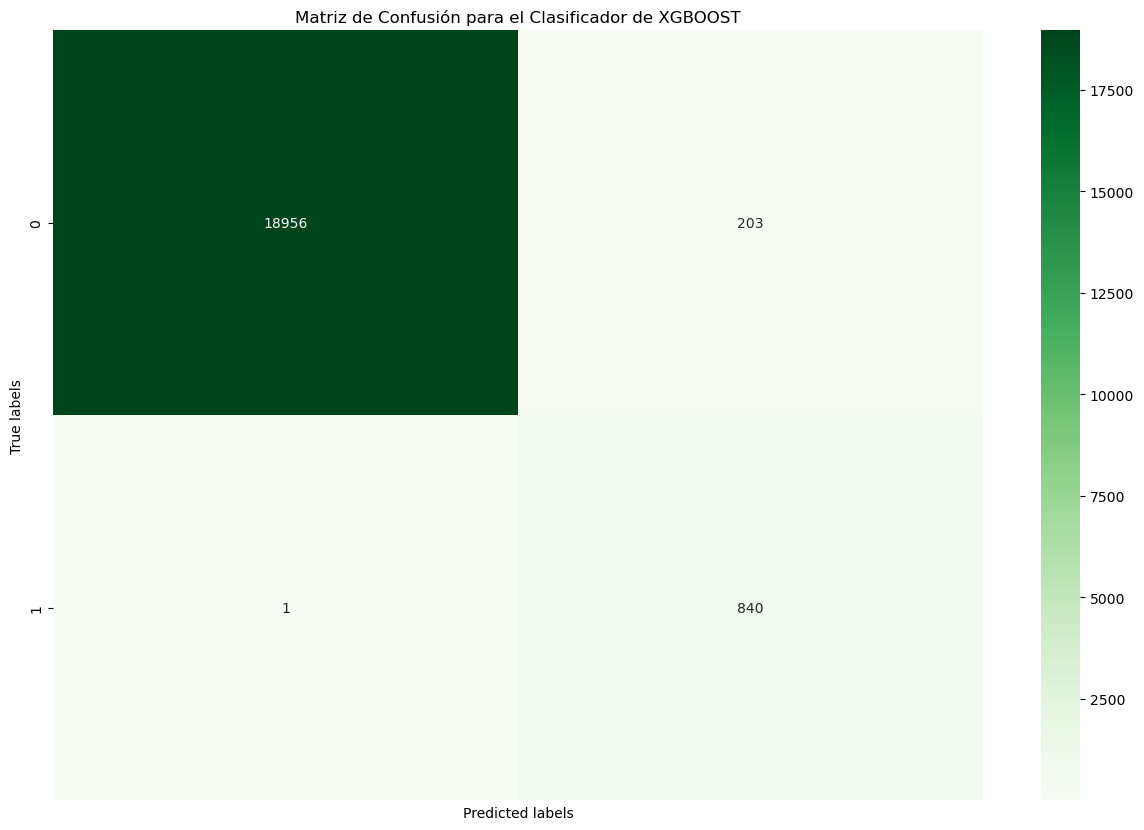

Precisión: (0        0
1        0
2        0
3        0
4        0
        ..
19995    0
19996    0
19997    0
19998    0
19999    1
Name: Panic Disorder Diagnosis, Length: 20000, dtype: int32, array([0, 0, 0, ..., 0, 0, 1]))
Informe de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     19159
           1       0.81      1.00      0.89       841

    accuracy                           0.99     20000
   macro avg       0.90      0.99      0.94     20000
weighted avg       0.99      0.99      0.99     20000



In [38]:
y_pred_t =model.predict(X_t)
cm_2 = confusion_matrix(Y_t, y_pred_t)
# Creamos un mapa de calor para poder apreciar los resultados de manera visual
plt.figure(figsize=(15, 10))
sns.heatmap(cm_2, annot=True, fmt="d", cmap="Greens", xticklabels=0, yticklabels=1)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Matriz de Confusión para el Clasificador de XGBOOST')
plt.show()
accuracy = (Y_t, y_pred_t)
report = classification_report(Y_t, y_pred_t)
print(f"Precisión: {accuracy}")
print("Informe de clasificación:")
print(report)

Aquí los resultados no fueron mejor que los del modelo pasado, pero tampoco están mal

# Creamos un nuevo dataset para identificar los falsos positivos

In [39]:
df_test = x_test.copy()
df_test["Actual"] = y_test
df_test["Predicted"] = y_pred
df_test

,Age,Gender_Female,Gender_Male,Family History_No,Family History_Yes,Personal History_No,Personal History_Yes,Current Stressors_High,Current Stressors_Low,Current Stressors_Moderate,...,Coping Mechanisms_Seeking therapy,Coping Mechanisms_Socializing,Social Support_High,Social Support_Low,Social Support_Moderate,Lifestyle Factors_Diet,Lifestyle Factors_Exercise,Lifestyle Factors_Sleep quality,Actual,Predicted
11644,30,1,0,1,0,0,1,0,1,0,...,0,0,0,0,1,1,0,0,0,0
3690,21,0,1,1,0,0,1,0,0,1,...,0,0,0,0,1,0,0,1,0,0
6230,45,0,1,1,0,1,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
73070,44,1,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,1,0,0,0
73021,23,1,0,1,0,1,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60654,31,0,1,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0
62556,21,1,0,0,1,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
13783,26,1,0,0,1,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
17702,57,0,1,0,1,0,1,1,0,0,...,1,0,0,1,0,0,0,1,0,1


In [ ]:
#Creamos el dataset de los 184 falsos positivos
falsos_positivos = df_test[(df_test["Actual"] == 0) & (df_test["Predicted"] == 1)]
pd.set_option('display.max_columns', None)
falsos_positivos


,Age,Gender_Female,Gender_Male,Family History_No,Family History_Yes,Personal History_No,Personal History_Yes,Current Stressors_High,Current Stressors_Low,Current Stressors_Moderate,Symptoms_Chest pain,Symptoms_Dizziness,Symptoms_Fear of losing control,Symptoms_Panic attacks,Symptoms_Shortness of breath,Severity_Mild,Severity_Moderate,Severity_Severe,Impact on Life_Mild,Impact on Life_Moderate,Impact on Life_Significant,Demographics_Rural,Demographics_Urban,Medical History_Asthma,Medical History_Diabetes,Medical History_Heart disease,Psychiatric History_Anxiety disorder,Psychiatric History_Bipolar disorder,Psychiatric History_Depressive disorder,Substance Use_Alcohol,Substance Use_Drugs,Coping Mechanisms_Exercise,Coping Mechanisms_Meditation,Coping Mechanisms_Seeking therapy,Coping Mechanisms_Socializing,Social Support_High,Social Support_Low,Social Support_Moderate,Lifestyle Factors_Diet,Lifestyle Factors_Exercise,Lifestyle Factors_Sleep quality,Actual,Predicted
81821,36,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1
23775,60,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1
58035,18,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
31794,32,0,1,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1
25093,38,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67927,30,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1
64617,20,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1
44539,55,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1
73775,61,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1


#### Deshacemos los dummies

In [41]:
column_mapping = {
    'Medical History': ['Medical History_Diabetes','Medical History_Asthma' ,'Medical History_Heart disease'],
    'Psychiatric History': ['Psychiatric History_Depressive disorder', 'Psychiatric History_Bipolar disorder', 'Psychiatric History_Anxiety disorder'], 
    'Substance Use': ['Substance Use_Drugs', 'Substance Use_Alcohol'],
    'Coping Mechanisms': ['Coping Mechanisms_Meditation', 'Coping Mechanisms_Seeking therapy', 'Coping Mechanisms_Socializing','Coping Mechanisms_Exercise'],
    'Lifestyle Factors': ['Lifestyle Factors_Diet', 'Lifestyle Factors_Exercise', 'Lifestyle Factors_Sleep quality'],
    'Gender': ['Gender_Female', 'Gender_Male'], 
    'Family History': ['Family History_No', 'Family History_Yes'], 
    'Personal History': ['Personal History_No', 'Personal History_Yes'],
    'Current Stressors': ['Current Stressors_Moderate', 'Current Stressors_High', 'Current Stressors_Low'], 
    'Demographics': ['Demographics_Rural', 'Demographics_Urban'], 
    'Social Support': ['Social Support_Moderate', 'Social Support_High', 'Social Support_Low'],
    'Symptoms': ['Symptoms_Shortness of breath', 'Symptoms_Panic attacks', 'Symptoms_Chest pain', 'Symptoms_Dizziness', 'Symptoms_Fear of losing control'],
    'Severity': ['Severity_Mild', 'Severity_Moderate', 'Severity_Severe'],
    'Impact on Life': ['Impact on Life_Mild', 'Impact on Life_Significant', 'Impact on Life_Moderate']
}

def reverse_dummies(df, column_mapping):
    reversed_df = df.copy()
    
    for original_col, dummy_cols in column_mapping.items():
        # Get the actual column names that exist in df with the original_col prefix
        existing_cols = [col for col in df.columns if any(col.endswith(dummy) for dummy in dummy_cols)]
        if existing_cols:
            # Create the new column based on the existing dummy columns
            reversed_df[original_col] = df[existing_cols].idxmax(axis=1).apply(lambda x: x.split('_')[-1])
            # Drop the dummy columns
            reversed_df = reversed_df.drop(columns=existing_cols)
    
    return reversed_df

falsos_positivos_reversed = reverse_dummies(falsos_positivos, column_mapping)
falsos_positivos_reversed

,Age,Actual,Predicted,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Lifestyle Factors,Gender,Family History,Personal History,Current Stressors,Demographics,Social Support,Symptoms,Severity,Impact on Life
81821,36,0,1,Asthma,Anxiety disorder,Alcohol,Socializing,Sleep quality,Female,Yes,Yes,Low,Urban,High,Panic attacks,Mild,Significant
23775,60,0,1,Heart disease,Anxiety disorder,Drugs,Socializing,Sleep quality,Male,Yes,No,High,Urban,High,Panic attacks,Severe,Mild
58035,18,0,1,Diabetes,Anxiety disorder,Alcohol,Meditation,Sleep quality,Male,Yes,Yes,High,Urban,Low,Chest pain,Severe,Significant
31794,32,0,1,Heart disease,Depressive disorder,Alcohol,Meditation,Sleep quality,Male,Yes,Yes,High,Urban,Moderate,Chest pain,Mild,Significant
25093,38,0,1,Diabetes,Anxiety disorder,Alcohol,Exercise,Sleep quality,Male,Yes,Yes,High,Urban,Low,Fear of losing control,Severe,Significant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67927,30,0,1,Diabetes,Bipolar disorder,Alcohol,Seeking therapy,Sleep quality,Male,No,Yes,Low,Urban,Moderate,Panic attacks,Severe,Moderate
64617,20,0,1,Asthma,Anxiety disorder,Drugs,Meditation,Sleep quality,Male,No,Yes,High,Urban,Low,Shortness of breath,Severe,Moderate
44539,55,0,1,Diabetes,Anxiety disorder,Drugs,Meditation,Sleep quality,Male,Yes,Yes,Low,Urban,High,Panic attacks,Severe,Mild
73775,61,0,1,Diabetes,Anxiety disorder,Drugs,Seeking therapy,Sleep quality,Male,Yes,No,Moderate,Rural,Moderate,Panic attacks,Severe,Significant


In [42]:
falsos_positivos_reversed = falsos_positivos_reversed[['Age', 'Gender', 'Family History', 'Personal History',
       'Current Stressors', 'Symptoms', 'Severity', 'Impact on Life',
       'Demographics', 'Medical History', 'Psychiatric History',
       'Substance Use', 'Coping Mechanisms', 'Social Support',
       'Lifestyle Factors','Actual', 'Predicted']]
falsos_positivos_reversed

,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Actual,Predicted
81821,36,Female,Yes,Yes,Low,Panic attacks,Mild,Significant,Urban,Asthma,Anxiety disorder,Alcohol,Socializing,High,Sleep quality,0,1
23775,60,Male,Yes,No,High,Panic attacks,Severe,Mild,Urban,Heart disease,Anxiety disorder,Drugs,Socializing,High,Sleep quality,0,1
58035,18,Male,Yes,Yes,High,Chest pain,Severe,Significant,Urban,Diabetes,Anxiety disorder,Alcohol,Meditation,Low,Sleep quality,0,1
31794,32,Male,Yes,Yes,High,Chest pain,Mild,Significant,Urban,Heart disease,Depressive disorder,Alcohol,Meditation,Moderate,Sleep quality,0,1
25093,38,Male,Yes,Yes,High,Fear of losing control,Severe,Significant,Urban,Diabetes,Anxiety disorder,Alcohol,Exercise,Low,Sleep quality,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67927,30,Male,No,Yes,Low,Panic attacks,Severe,Moderate,Urban,Diabetes,Bipolar disorder,Alcohol,Seeking therapy,Moderate,Sleep quality,0,1
64617,20,Male,No,Yes,High,Shortness of breath,Severe,Moderate,Urban,Asthma,Anxiety disorder,Drugs,Meditation,Low,Sleep quality,0,1
44539,55,Male,Yes,Yes,Low,Panic attacks,Severe,Mild,Urban,Diabetes,Anxiety disorder,Drugs,Meditation,High,Sleep quality,0,1
73775,61,Male,Yes,No,Moderate,Panic attacks,Severe,Significant,Rural,Diabetes,Anxiety disorder,Drugs,Seeking therapy,Moderate,Sleep quality,0,1


### Veamos algunos patrones

['Sleep quality']


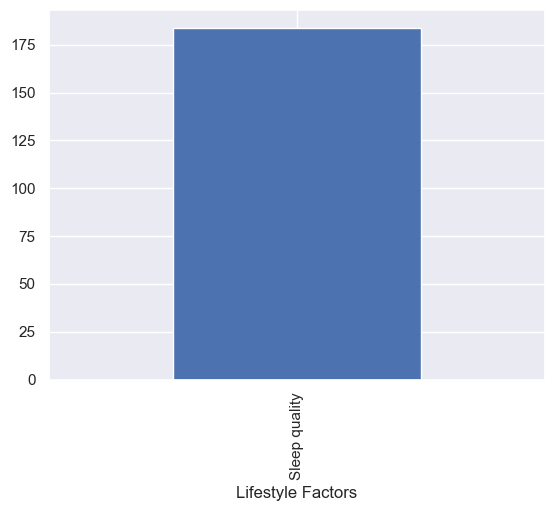

In [43]:
sns.set()
falsos_positivos_reversed["Lifestyle Factors"].value_counts().plot(kind = "bar")
print(falsos_positivos_reversed["Lifestyle Factors"].unique())
plt.show() 


Todos los falsos positivos tienen un mal control del sueño, algo que es de suma importancia para el modelo

['Panic attacks' 'Chest pain' 'Fear of losing control'
 'Shortness of breath' 'Dizziness']


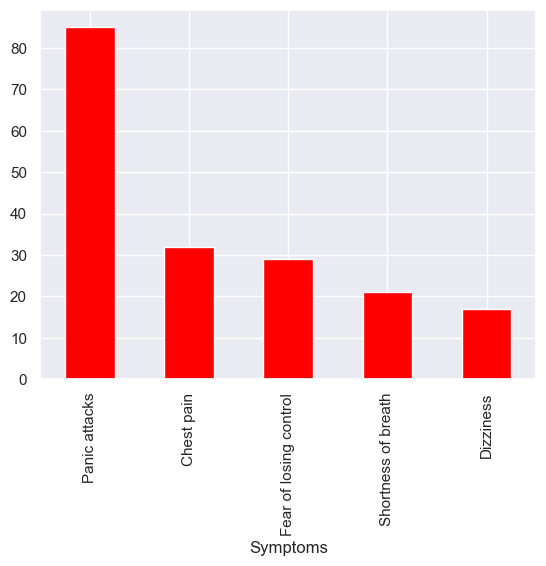

In [44]:
falsos_positivos_reversed["Symptoms"].value_counts().plot(kind = "bar", color="red")
print(falsos_positivos_reversed["Symptoms"].unique())
plt.show() 

['Low' 'High' 'Moderate']


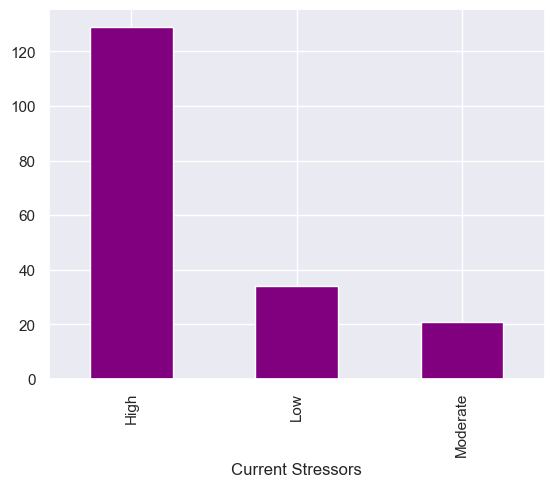

In [45]:
falsos_positivos_reversed["Current Stressors"].value_counts().plot(kind = "bar", color="purple")
print(falsos_positivos_reversed["Current Stressors"].unique())
plt.show() 





['Socializing' 'Meditation' 'Exercise' 'Seeking therapy']


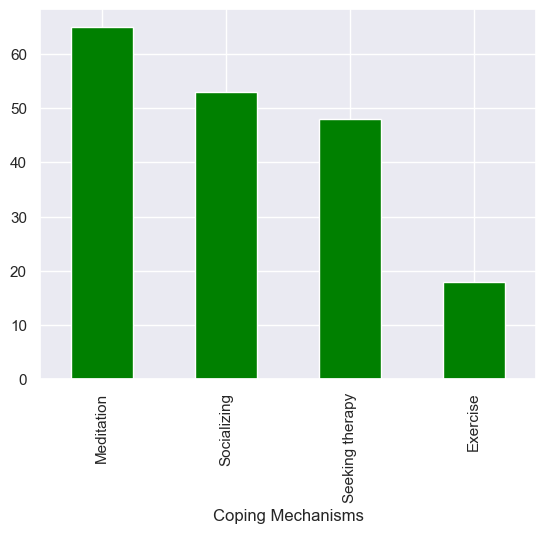

In [46]:
falsos_positivos_reversed["Coping Mechanisms"].value_counts().plot(kind = "bar", color="green")
print(falsos_positivos_reversed["Coping Mechanisms"].unique())
plt.show() 




['Significant' 'Mild' 'Moderate']


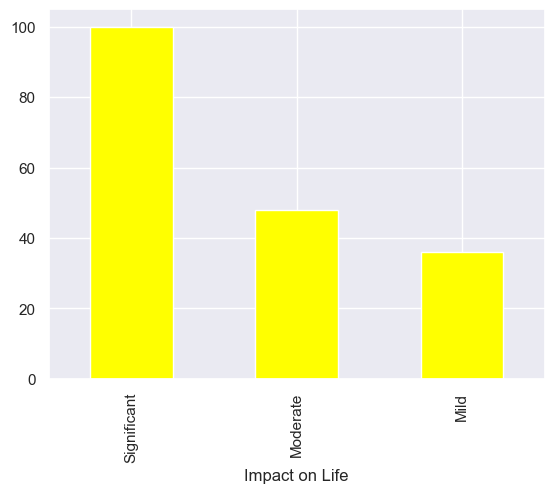

In [47]:
falsos_positivos_reversed["Impact on Life"].value_counts().plot(kind = "bar", color="yellow")
print(falsos_positivos_reversed["Impact on Life"].unique())
plt.show() 



['High' 'Low' 'Moderate']


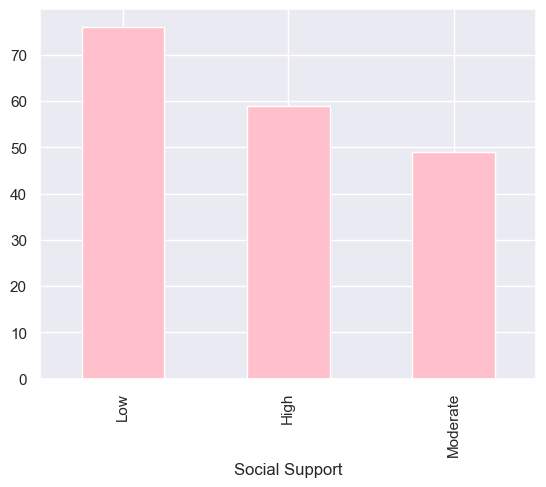

In [48]:
falsos_positivos_reversed["Social Support"].value_counts().plot(kind = "bar", color="pink")
print(falsos_positivos_reversed["Social Support"].unique())
plt.show() 

### Veamos y analicemos a los verdaderos negativos

In [49]:
veraderos_negativos = df_test[(df_test["Actual"] == 0) & (df_test["Predicted"] == 0)]
veraderos_negativos_reversed = reverse_dummies(veraderos_negativos, column_mapping)
veraderos_negativos_reversed = veraderos_negativos_reversed[['Age', 'Gender', 'Family History', 'Personal History',
       'Current Stressors', 'Symptoms', 'Severity', 'Impact on Life',
       'Demographics', 'Medical History', 'Psychiatric History',
       'Substance Use', 'Coping Mechanisms', 'Social Support',
       'Lifestyle Factors','Actual', 'Predicted']]
veraderos_negativos_reversed

,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Actual,Predicted
11644,30,Female,No,Yes,Low,Dizziness,Mild,Moderate,Urban,Heart disease,Depressive disorder,Drugs,Meditation,Moderate,Diet,0,0
3690,21,Male,No,Yes,Moderate,Chest pain,Moderate,Mild,Urban,Asthma,Bipolar disorder,Drugs,Meditation,Moderate,Sleep quality,0,0
6230,45,Male,No,No,Low,Shortness of breath,Severe,Significant,Urban,Asthma,Depressive disorder,Drugs,Exercise,Low,Exercise,0,0
73070,44,Female,No,Yes,Low,Panic attacks,Severe,Significant,Rural,Asthma,Depressive disorder,Alcohol,Meditation,High,Exercise,0,0
73021,23,Female,No,No,Low,Dizziness,Mild,Mild,Urban,Heart disease,Anxiety disorder,Alcohol,Seeking therapy,Low,Sleep quality,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11725,45,Male,Yes,Yes,Moderate,Shortness of breath,Moderate,Mild,Urban,Heart disease,Bipolar disorder,Alcohol,Meditation,High,Exercise,0,0
60654,31,Male,No,Yes,Low,Fear of losing control,Moderate,Mild,Rural,Heart disease,Depressive disorder,Drugs,Meditation,Low,Sleep quality,0,0
62556,21,Female,Yes,No,Low,Panic attacks,Mild,Significant,Rural,Heart disease,Anxiety disorder,Drugs,Exercise,Moderate,Exercise,0,0
13783,26,Female,Yes,No,High,Chest pain,Moderate,Mild,Urban,Diabetes,Depressive disorder,Drugs,Exercise,Moderate,Sleep quality,0,0


['Diet' 'Sleep quality' 'Exercise']


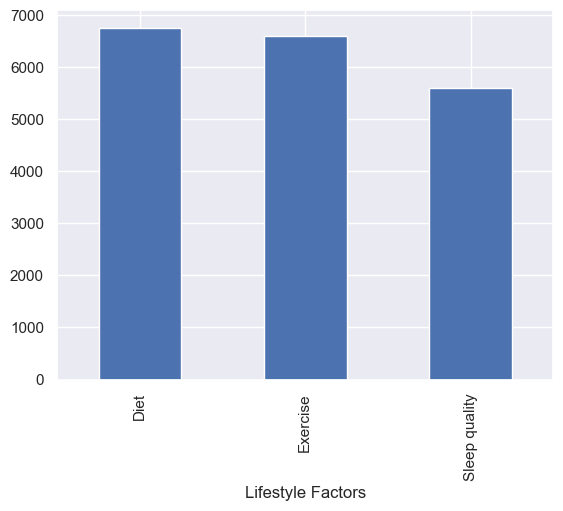

In [50]:
veraderos_negativos_reversed["Lifestyle Factors"].value_counts().plot(kind = "bar")
print(veraderos_negativos_reversed["Lifestyle Factors"].unique())
plt.show() 

['Meditation' 'Exercise' 'Seeking therapy' 'Socializing']


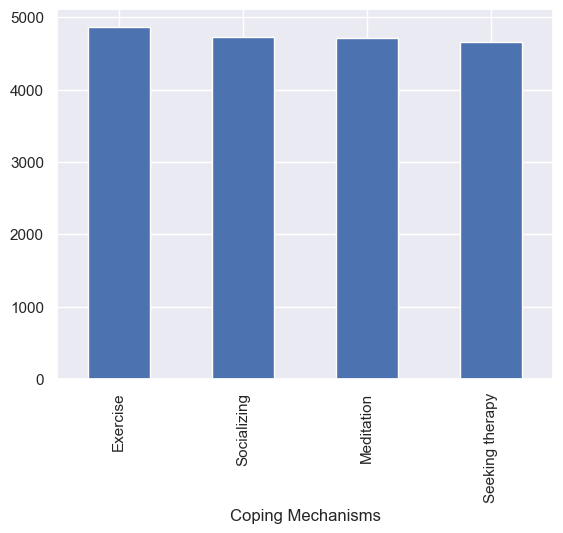

In [51]:
veraderos_negativos_reversed["Coping Mechanisms"].value_counts().plot(kind = "bar")
print(veraderos_negativos_reversed["Coping Mechanisms"].unique())
plt.show() 

['Moderate' 'Low' 'High']


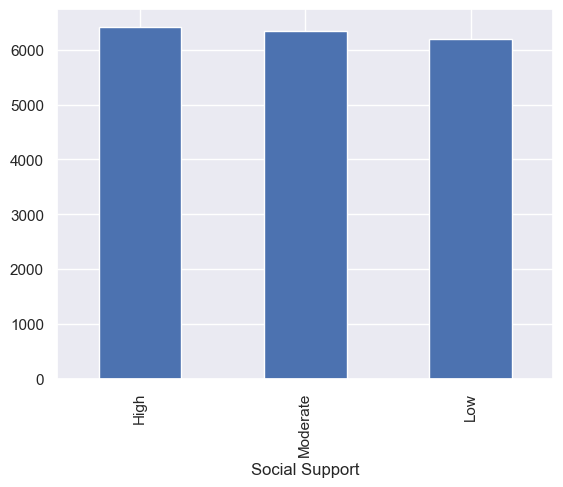

In [52]:
veraderos_negativos_reversed["Social Support"].value_counts().plot(kind = "bar")
print(veraderos_negativos_reversed["Social Support"].unique())
plt.show() 

### Veamos por último a los veraderos positivos

In [53]:
veraderos_positivos = df_test[(df_test["Actual"] == 1) & (df_test["Predicted"] == 1)]
veraderos_positivos_reversed = reverse_dummies(veraderos_positivos, column_mapping)
veraderos_positivos_reversed = veraderos_positivos_reversed[['Age', 'Gender', 'Family History', 'Personal History',
       'Current Stressors', 'Symptoms', 'Severity', 'Impact on Life',
       'Demographics', 'Medical History', 'Psychiatric History',
       'Substance Use', 'Coping Mechanisms', 'Social Support',
       'Lifestyle Factors','Actual', 'Predicted']]
veraderos_positivos_reversed

,Age,Gender,Family History,Personal History,Current Stressors,Symptoms,Severity,Impact on Life,Demographics,Medical History,Psychiatric History,Substance Use,Coping Mechanisms,Social Support,Lifestyle Factors,Actual,Predicted
19376,61,Female,No,Yes,High,Fear of losing control,Mild,Significant,Urban,Diabetes,Anxiety disorder,Drugs,Socializing,Moderate,Sleep quality,1,1
49589,59,Male,Yes,Yes,High,Chest pain,Mild,Significant,Rural,Diabetes,Anxiety disorder,Alcohol,Meditation,Moderate,Sleep quality,1,1
45285,59,Male,No,Yes,Low,Panic attacks,Severe,Significant,Rural,Asthma,Anxiety disorder,Drugs,Socializing,High,Sleep quality,1,1
822,30,Male,Yes,Yes,Moderate,Panic attacks,Mild,Significant,Rural,Diabetes,Anxiety disorder,Alcohol,Meditation,Moderate,Sleep quality,1,1
81130,38,Male,Yes,No,High,Shortness of breath,Severe,Moderate,Rural,Asthma,Anxiety disorder,Drugs,Exercise,Low,Sleep quality,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7646,41,Male,Yes,No,Low,Panic attacks,Severe,Mild,Rural,Heart disease,Anxiety disorder,Drugs,Socializing,Moderate,Sleep quality,1,1
64879,42,Male,Yes,Yes,High,Panic attacks,Moderate,Significant,Urban,Heart disease,Bipolar disorder,Alcohol,Seeking therapy,High,Sleep quality,1,1
60044,22,Female,Yes,Yes,High,Panic attacks,Severe,Mild,Rural,Diabetes,Bipolar disorder,Alcohol,Meditation,High,Sleep quality,1,1
92723,23,Male,Yes,Yes,High,Chest pain,Severe,Significant,Urban,Asthma,Anxiety disorder,Alcohol,Seeking therapy,Low,Sleep quality,1,1


['Sleep quality']


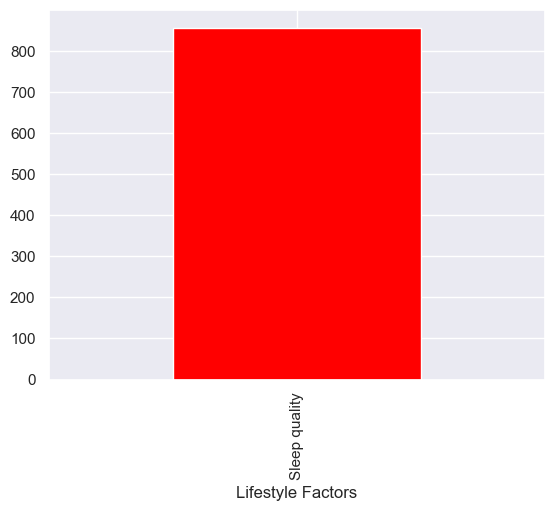

In [54]:
veraderos_positivos_reversed["Lifestyle Factors"].value_counts().plot(kind = "bar",color = "red")
print(veraderos_positivos_reversed["Lifestyle Factors"].unique())
plt.show() 


['Socializing' 'Meditation' 'Exercise' 'Seeking therapy']


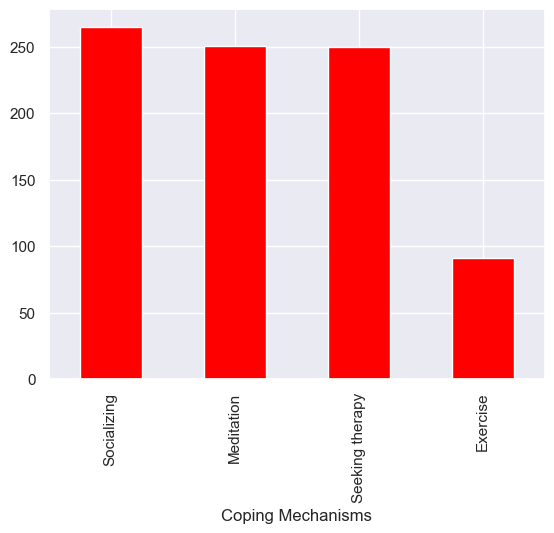

In [55]:
veraderos_positivos_reversed["Coping Mechanisms"].value_counts().plot(kind = "bar",color = "red")
print(veraderos_positivos_reversed["Coping Mechanisms"].unique())
plt.show() 

['Moderate' 'High' 'Low']


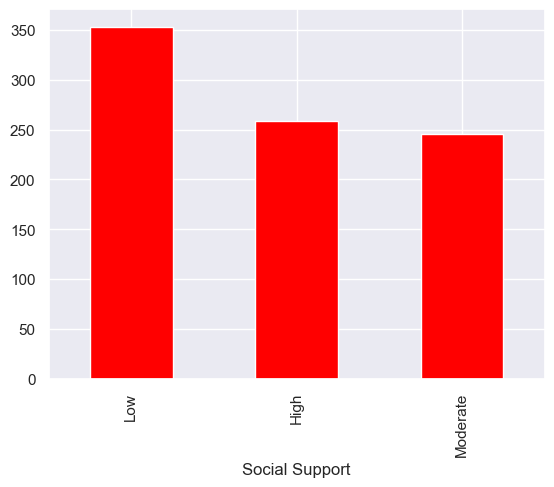

In [56]:
veraderos_positivos_reversed["Social Support"].value_counts().plot(kind = "bar", color="red")
print(veraderos_positivos_reversed["Social Support"].unique())
plt.show() 

## Una forma de verlas mejorer para compararlas

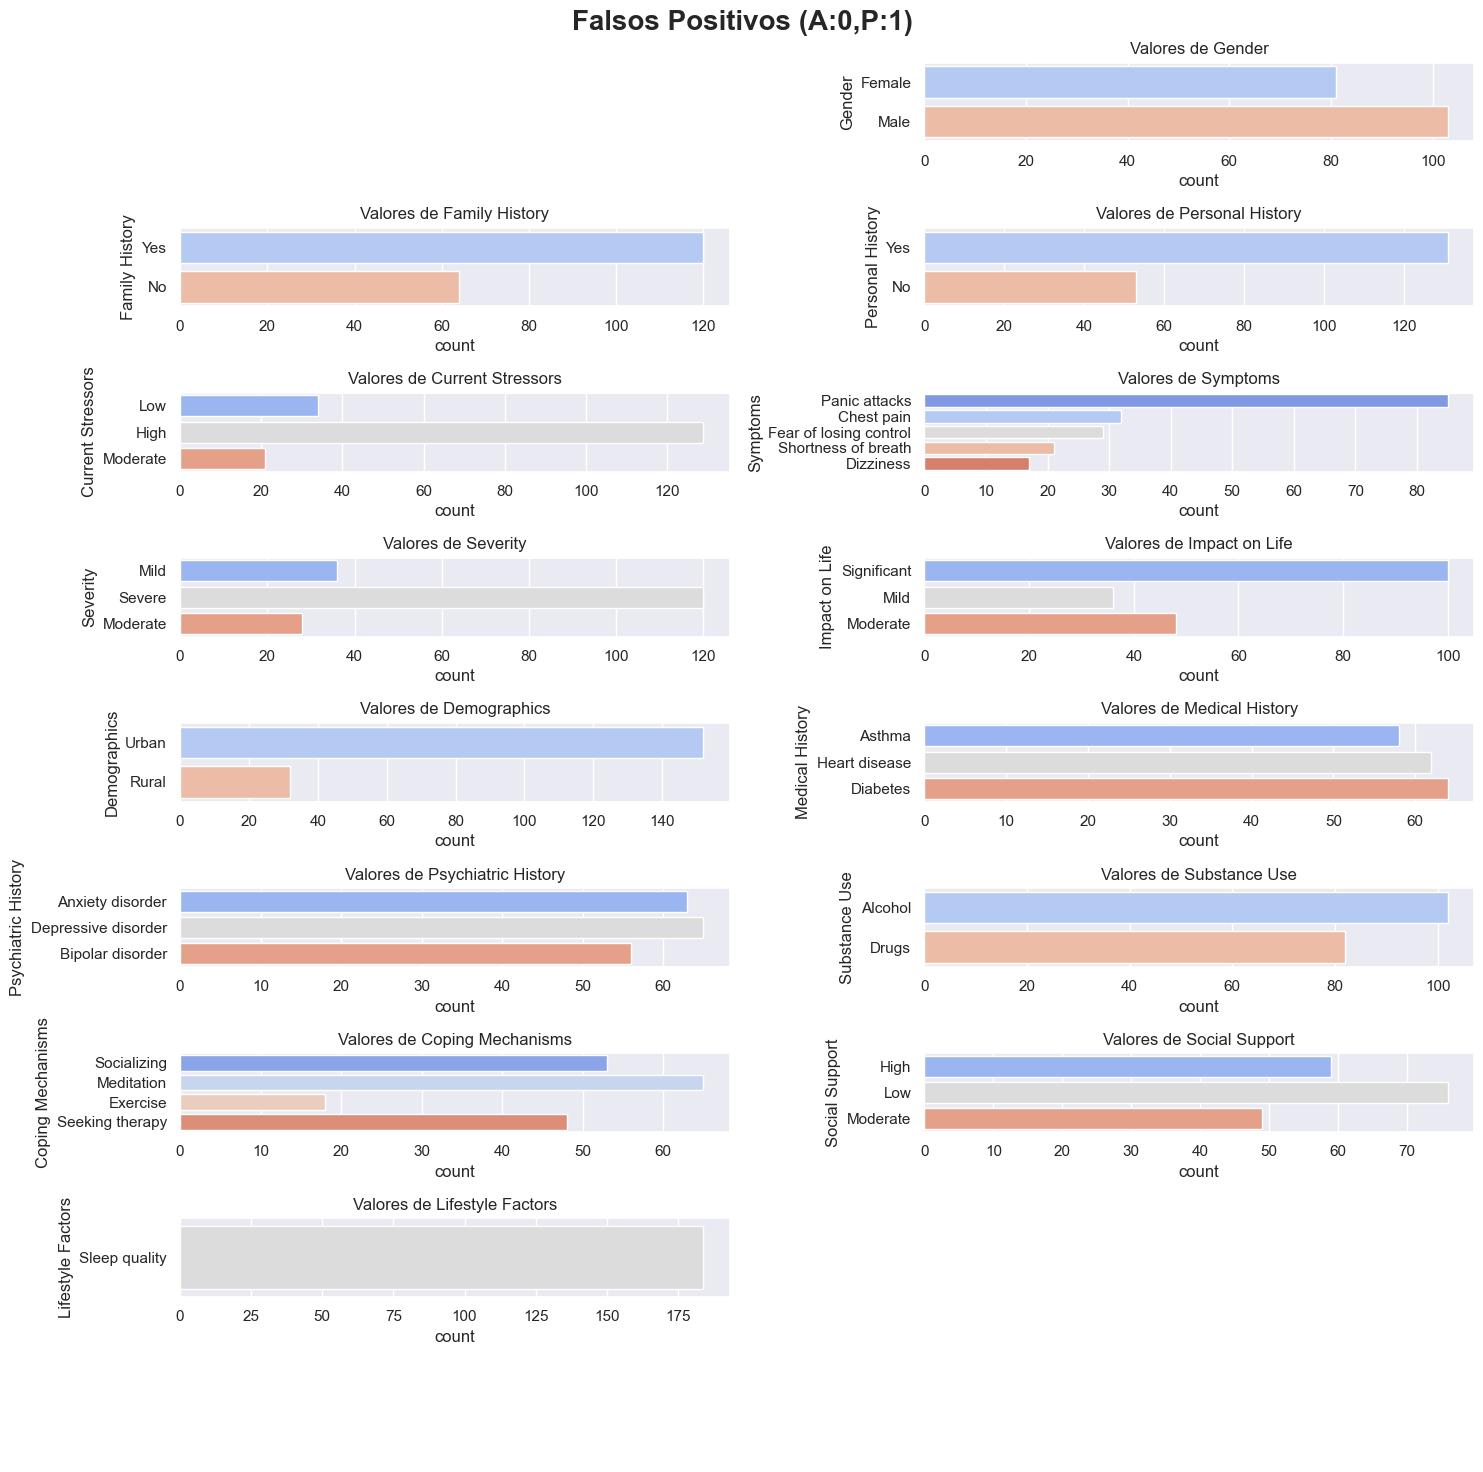

In [ ]:
fig, axes = plt.subplots(nrows = 9, ncols = 2, figsize=(15,15))
fig.suptitle("Falsos Positivos (A:0,P:1)", fontsize=20, fontweight="bold")
axes = axes.flatten()
columnas_no = ["Age","Actual","Predicted"]

for i,column in enumerate(falsos_positivos_reversed.columns):
    if column not in columnas_no:
        sns.countplot(y = falsos_positivos_reversed[column],ax=axes[i], hue=falsos_positivos_reversed[column], palette="coolwarm", legend=False)
        axes[i].set_title("Valores de {}".format(column))
    else:
        axes[i].axis("off")
        
for i in range(17, len(axes)):
    axes[i].axis("off")
    
plt.tight_layout()
plt.show()

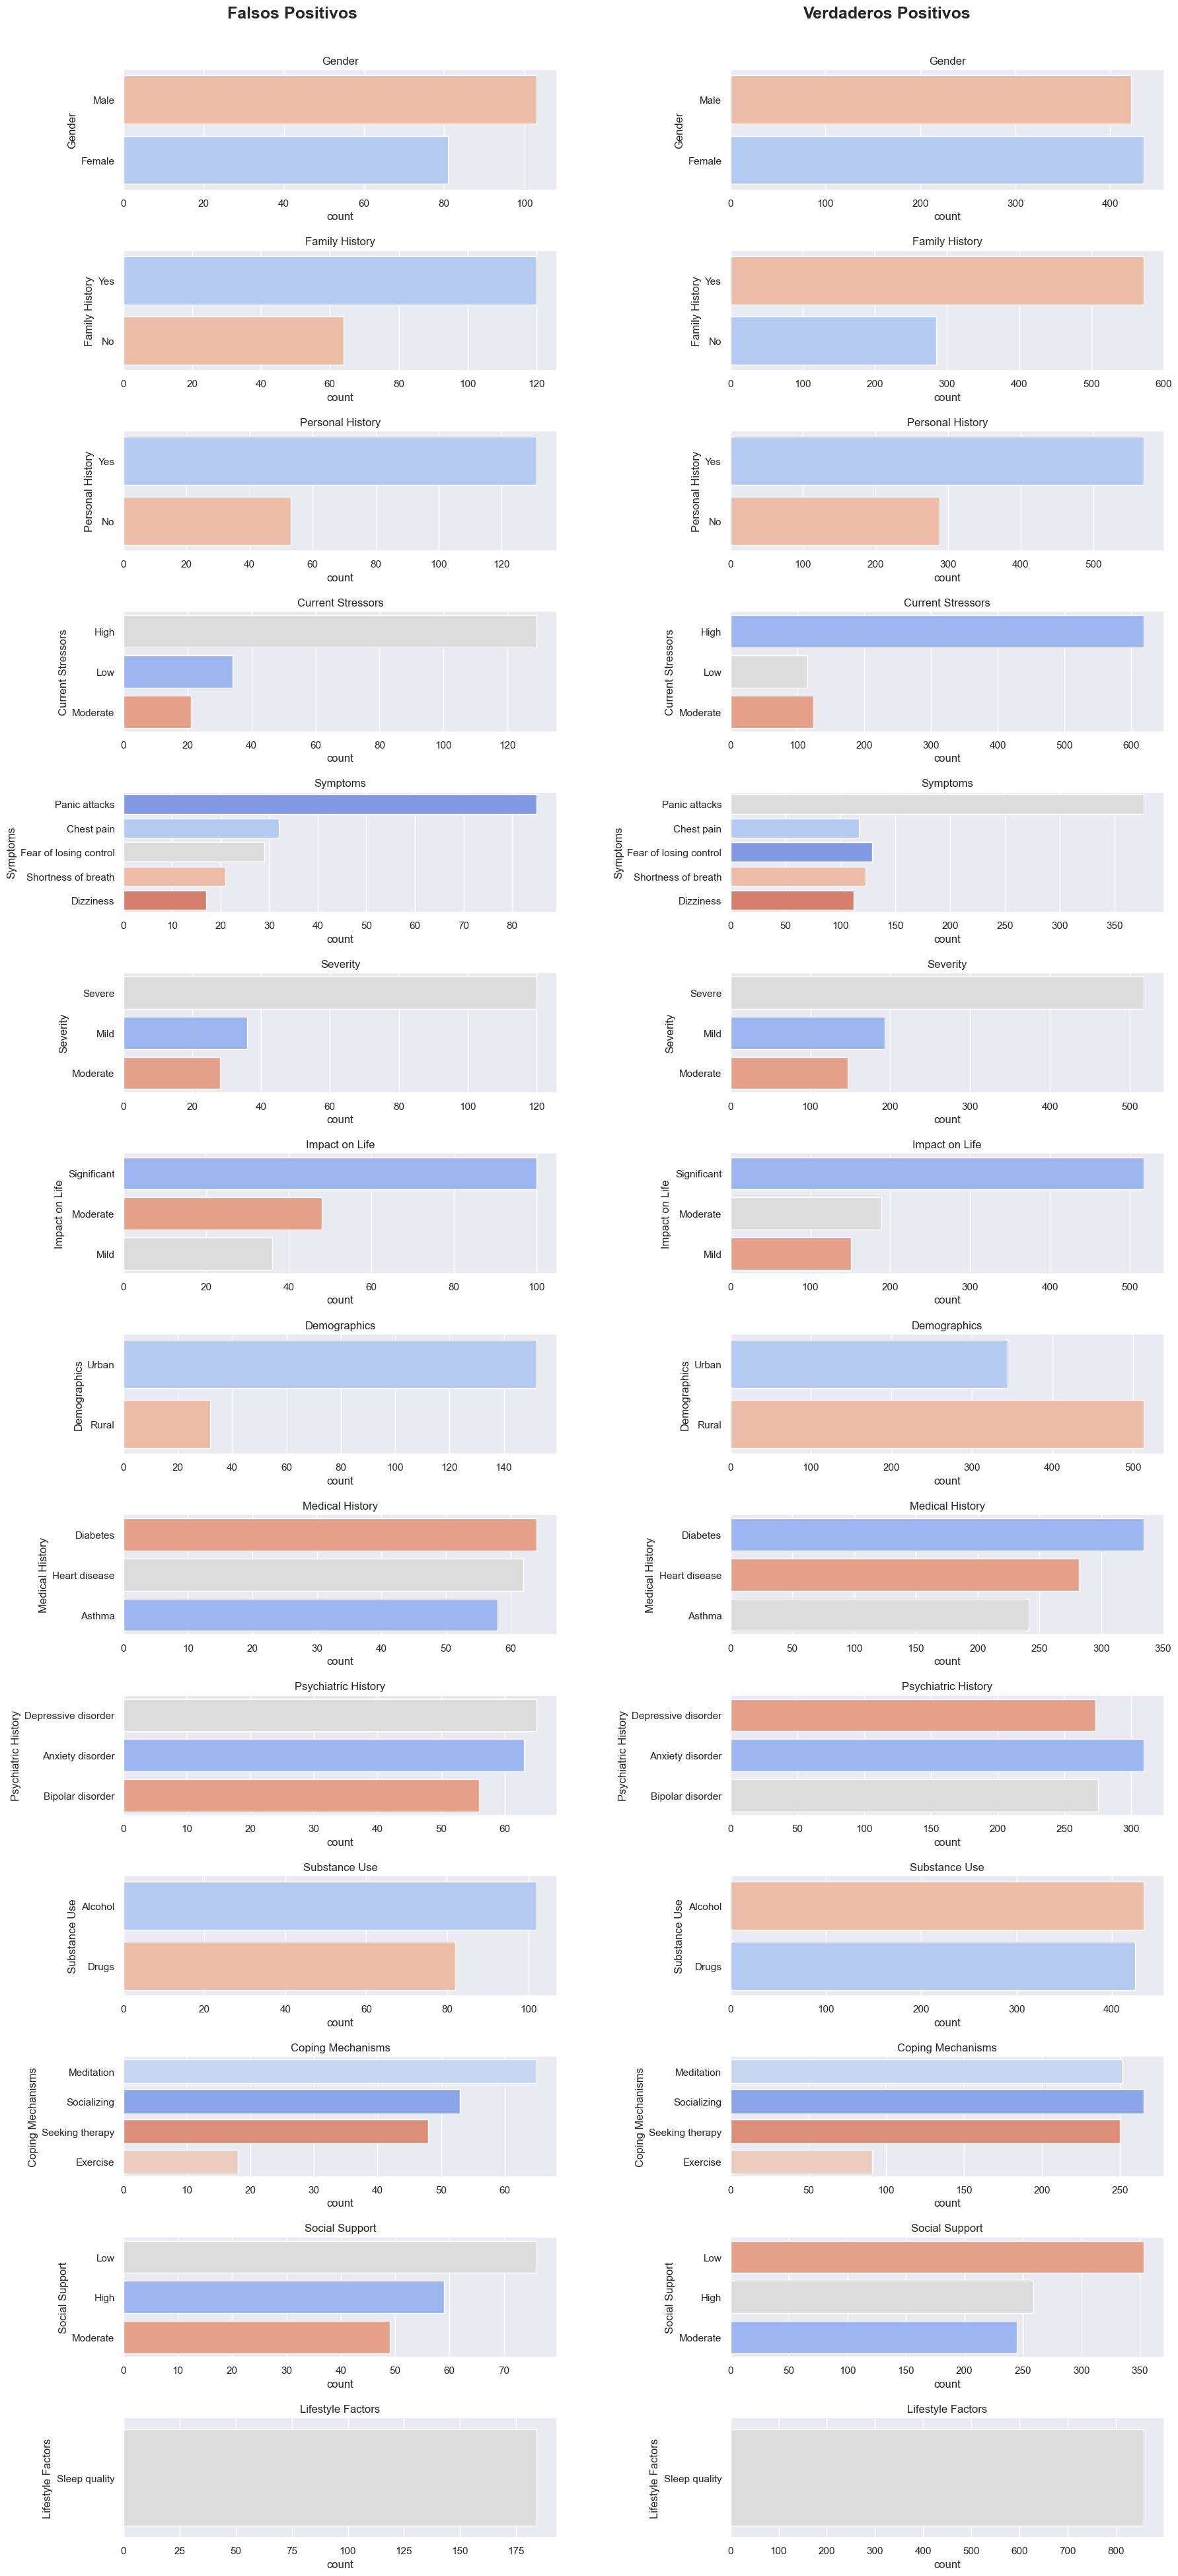

In [76]:
df_l = falsos_positivos_reversed
df_r = veraderos_positivos_reversed
columnas_si = [col for col in falsos_positivos_reversed.columns if col not in columnas_no]

fig,axes = plt.subplots(nrows = 14, ncols=2, figsize = (18,40))
fig.text(0.25,0.97, "Falsos Positivos", ha="center", fontsize=18,fontweight = "bold")
fig.text(0.75,0.97, "Verdaderos Positivos", ha="center", fontsize=18,fontweight = "bold")

axes = axes.flatten()

for i,column in enumerate(columnas_si):
    order = df_l[column].value_counts().index
    sns.countplot(y=df_l[column],ax=axes[i*2], hue=df_l[column], palette="coolwarm", legend=False,order=order)
    axes[i*2].set_title("{}".format(column))
    
    sns.countplot(y=df_r[column],ax=axes[i*2 + 1], hue=df_r[column], palette="coolwarm", legend=False, order=order)
    axes[i*2 + 1].set_title("{}".format(column))

plt.tight_layout(rect=[0,0,1,0.96])
plt.subplots_adjust(hspace=0.5,wspace=0.4)
plt.show()